In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Drop the 'species' column, as this is a clustering problem
# In this case, the 'target' column in the dataset represents the species, but we are not using it for clustering
df['species'] = iris.target

# Display the first few rows of the dataframe
df.head()

# Optionally, if you want to drop the 'species' column explicitly, you can do this:
df = df.drop(columns=['species'])

# Display the dataframe after dropping the 'species' column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


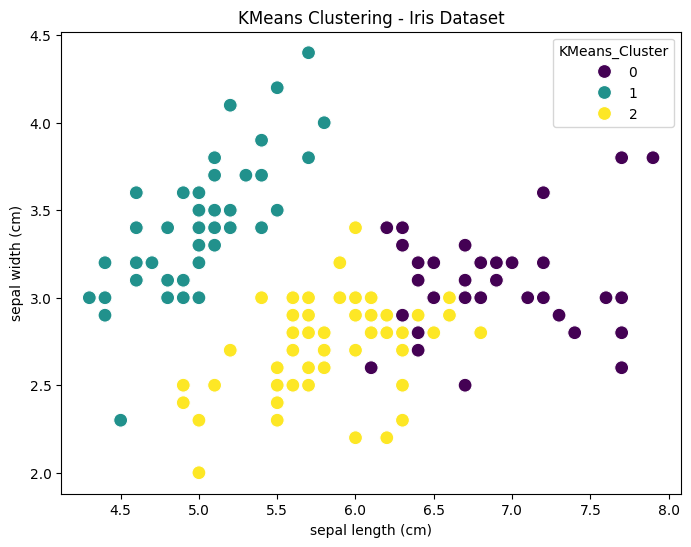

In [3]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess the Iris dataset
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We know there are 3 species
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Step 3: Visualize the clusters (we can use the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['KMeans_Cluster'], palette="viridis", s=100)
plt.title("KMeans Clustering - Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [ ]:
# KMeans clustering is an unsupervised machine learning algorithm used to partition data into K distinct clusters. The algorithm works as follows:

# Initialize centroids: Randomly select K data points as the initial centroids (or centers of the clusters).
# Assign points to clusters: Assign each data point to the nearest centroid based on the Euclidean distance.
# Recompute centroids: After all points are assigned to clusters, compute the new centroid for each cluster as the mean of the points in that cluster.
# Repeat: Repeat steps 2 and 3 until the centroids no longer change or until a predefined number of iterations is reached.

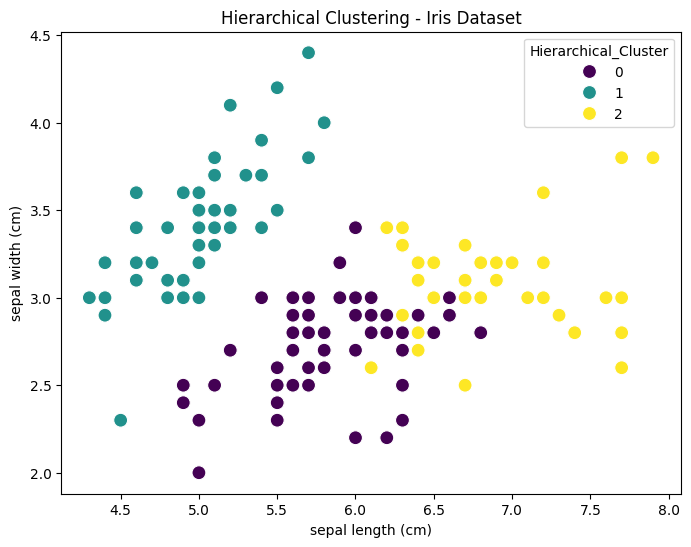

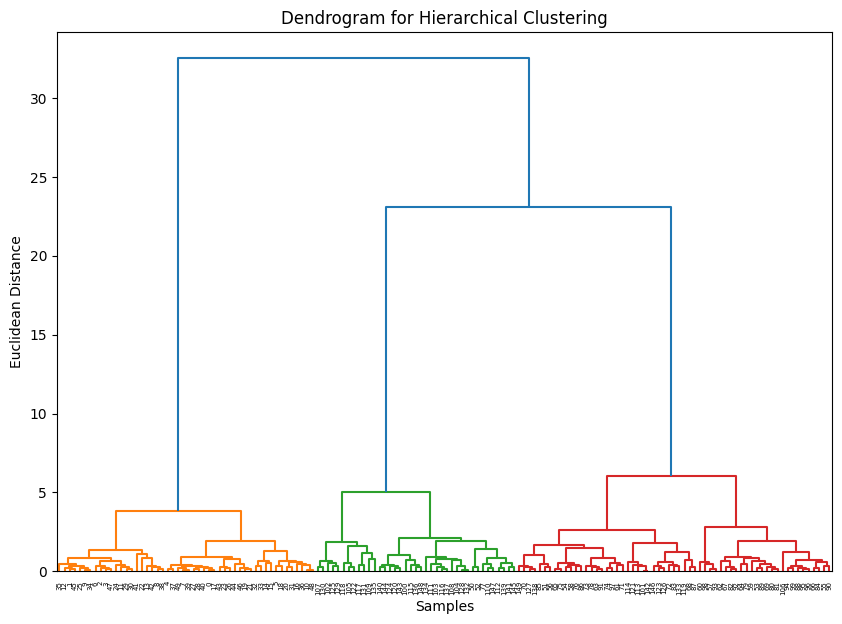

In [5]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Step 1: Apply Hierarchical Clustering
# Use 'ward' linkage which minimizes the variance within clusters, no need for 'affinity' in this case
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df)

# Step 2: Visualize the clusters (we can use the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette="viridis", s=100)
plt.title("Hierarchical Clustering - Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Step 3: Dendrogram to visualize the clustering process
# For visualizing the hierarchical structure, use scipy's linkage and dendrogram functions
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
# Hierarchical clustering is another unsupervised machine learning algorithm that builds a hierarchy of clusters:

# Agglomerative Approach (bottom-up): Start with each data point as its own cluster. Then, iteratively merge the two closest clusters until all points are in one single cluster.
# Divisive Approach (top-down): Start with all data points in one cluster and recursively split it into smaller clusters.